## 平时作业（1）：多层神经网络的训练

- 李锦韬 2201213292

### 作业要求

**请根据自己的计算环境情况和兴趣，选择以下两个数据集之一，完成如下的实验：**    
- http://yann.lecun.com/exdb/mnist/
- https://www.cs.toronto.edu/~kriz/cifar.html

**1. 构造一个多层的神经网络（注意，不要使用卷积神经网络，本题目要求使用多层神经网络），并在上述数据集任务上进行训练，并汇报一个“使用了你认为最优的超参数配置的神经网络”的学习曲线；要求如下：**
* （1）自己手动完成反向传播算法部分的编写；
* （2）该网络应为一个“纯净”的多层神经网络，不使用正则化方法、率优化算法等；

**2. 在上述“你认为最优配置的神经网络”的基础上，**
* （1）分别汇报“增加一个隐藏层”和“减小一个隐藏层”情况下的学习曲线； 
* （2）分别汇报使用BGD和SGD进行训练的学习曲线；
* （3）分别汇报使用两种以上参数初始化方法下的学习曲线；
* （4）分别汇报使用两种以上学习率优化算法下的学习曲线；
* （5）分别汇报使用两种以上正则化方法下的学习曲线；

**最终提交：包含6个子文件夹的一个zip文件，其中的子文件夹应包含：**
* （1）对应上述6种情况之一的一份源代码；
* （2）对应上述源代码的学习曲线的一个.png文件；

## 5. 使用不同学习率优化

### 5.1 使用MBGD

Epoch 1/40, train loss: 0.866565, train acc: 0.780550, test acc: 0.789100
Epoch 2/40, train loss: 0.598355, train acc: 0.849083, test acc: 0.855000
Epoch 3/40, train loss: 0.400406, train acc: 0.874850, test acc: 0.879900
Epoch 4/40, train loss: 0.583812, train acc: 0.888850, test acc: 0.893900
Epoch 5/40, train loss: 0.326636, train acc: 0.897317, test acc: 0.901900
Epoch 6/40, train loss: 0.246408, train acc: 0.903467, test acc: 0.906800
Epoch 7/40, train loss: 0.210203, train acc: 0.908717, test acc: 0.911600
Epoch 8/40, train loss: 0.438589, train acc: 0.912183, test acc: 0.916800
Epoch 9/40, train loss: 0.181812, train acc: 0.915183, test acc: 0.920200
Epoch 10/40, train loss: 0.395112, train acc: 0.918567, test acc: 0.922300
Epoch 11/40, train loss: 0.351393, train acc: 0.921383, test acc: 0.924200
Epoch 12/40, train loss: 0.341959, train acc: 0.923483, test acc: 0.926900
Epoch 13/40, train loss: 0.401255, train acc: 0.925600, test acc: 0.928000
Epoch 14/40, train loss: 0.161134,

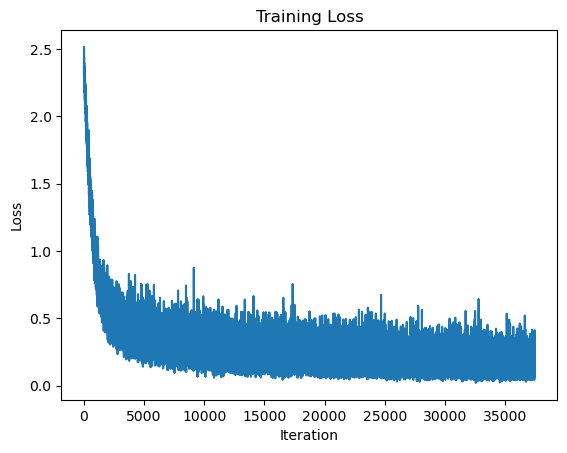

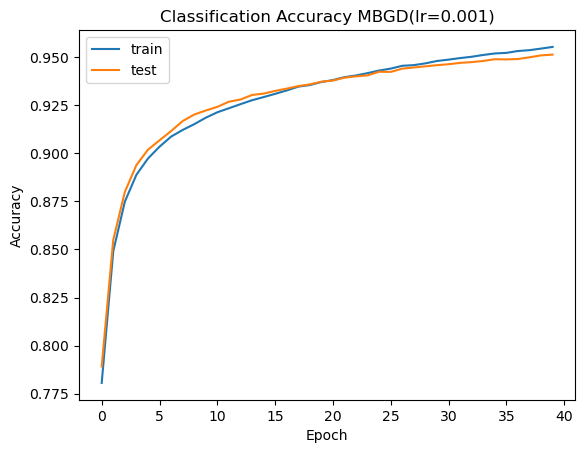

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 获取MNIST数据集
def load_mnist():
    with open("../data/" + "mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
X_train, y_train, X_test, y_test = load_mnist()

# 归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 标准化处理
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# 将标签转化为one-hot向量
n_classes = 10
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

# 定义网络结构
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = n_classes

# 初始化权重和偏置 采用随机初始化
W1 = np.random.randn(input_size, hidden_size_1) / np.sqrt(input_size)
b1 = np.zeros(hidden_size_1)
W2 = np.random.randn(hidden_size_1, hidden_size_2) / np.sqrt(hidden_size_1)
b2 = np.zeros(hidden_size_2)
W3 = np.random.randn(hidden_size_2, output_size) / np.sqrt(hidden_size_2)
b3 = np.zeros(output_size)

# 定义激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_pred.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples
    return loss

# 定义训练函数
def train(X, y_true, learning_rate):
    global W1, W2, W3, b1, b2, b3
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    m = y_true.shape[0]
    # 计算损失函数值和梯度
    loss = cross_entropy_loss(y_pred, y_true)

    grad_y_pred = y_pred - y_true

    grad_W3 = 1./m*np.dot(a2.T, grad_y_pred)
    grad_b3 = 1./m*np.sum(grad_y_pred, axis=0)
    grad_a2 = np.dot(grad_y_pred, W3.T)

    grad_z2 = grad_a2.copy()
    grad_z2[z2 < 0] = 0
    grad_W2 = 1./m*np.dot(a1.T, grad_z2)
    grad_b2 = 1./m*np.sum(grad_z2, axis=0)
    grad_a1 = np.dot(grad_z2, W2.T)

    grad_z1 = grad_a1.copy()
    grad_z1[z1 < 0] = 0
    grad_W1 = 1./m*np.dot(X.T, grad_z1)
    grad_b1 = 1./m*np.sum(grad_z1, axis=0)

    # 更新权重和偏置
    W3 -= learning_rate * grad_W3
    b3 -= learning_rate * grad_b3
    W2 -= learning_rate * grad_W2
    b2 -= learning_rate * grad_b2
    W1 -= learning_rate * grad_W1
    b1 -= learning_rate * grad_b1

    return loss

def predict(X):
    global W1, W2, W3, b1, b2, b3
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    return np.argmax(y_pred, axis=-1)

learning_rate = 0.001
num_epochs = 40
batch_size = 64
num_batches = X_train.shape[0] // batch_size

train_loss_history = []
train_acc_history0 = []
test_acc_history0 = []
for epoch in range(num_epochs):
    # 在每个epoch前随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    for i in range(num_batches):
        # 从训练数据中随机抽取一个batch
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]

        # 训练一个batch，并记录损失函数值
        loss = train(X_batch, y_batch, learning_rate)
        train_loss_history.append(loss)

    # 计算训练集和测试集上的精度
    train_acc = np.mean(predict(X_train) == np.argmax(y_train, axis=-1))
    test_acc = np.mean(predict(X_test) == np.argmax(y_test, axis=-1))
    train_acc_history0.append(train_acc)
    test_acc_history0.append(test_acc)

    # 输出训练进度
    print('Epoch %d/%d, train loss: %f, train acc: %f, test acc: %f' % (epoch+1, num_epochs, loss, train_acc, test_acc))

plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc_history0, label='train')
plt.plot(test_acc_history0, label='test')
plt.title('Classification Accuracy MBGD(lr=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 5.2 使用momentum

Epoch 1/40, train loss: 0.801072, train acc: 0.773883, test acc: 0.785100
Epoch 2/40, train loss: 0.355830, train acc: 0.840200, test acc: 0.848200
Epoch 3/40, train loss: 0.437148, train acc: 0.867300, test acc: 0.872600
Epoch 4/40, train loss: 0.469843, train acc: 0.882367, test acc: 0.886100
Epoch 5/40, train loss: 0.260705, train acc: 0.893633, test acc: 0.892200
Epoch 6/40, train loss: 0.314823, train acc: 0.901317, test acc: 0.900000
Epoch 7/40, train loss: 0.176674, train acc: 0.907850, test acc: 0.903900
Epoch 8/40, train loss: 0.249362, train acc: 0.912333, test acc: 0.908400
Epoch 9/40, train loss: 0.370375, train acc: 0.916783, test acc: 0.911200
Epoch 10/40, train loss: 0.251647, train acc: 0.920500, test acc: 0.915900
Epoch 11/40, train loss: 0.268355, train acc: 0.923333, test acc: 0.919300
Epoch 12/40, train loss: 0.338477, train acc: 0.926550, test acc: 0.921200
Epoch 13/40, train loss: 0.157550, train acc: 0.929067, test acc: 0.923500
Epoch 14/40, train loss: 0.257818,

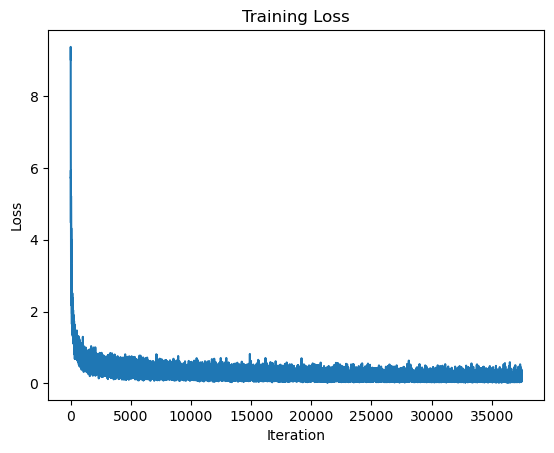

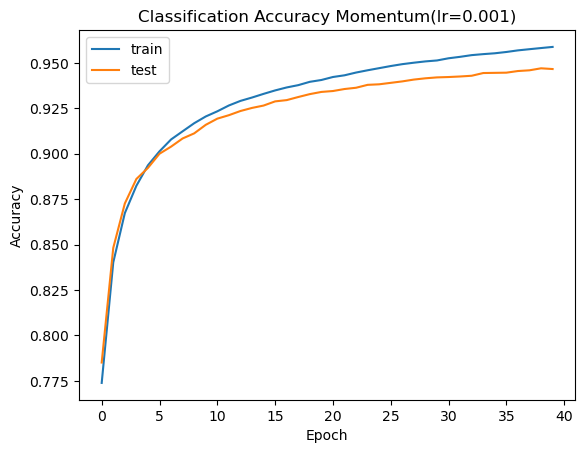

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 获取MNIST数据集
def load_mnist():
    with open("../data/" + "mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
X_train, y_train, X_test, y_test = load_mnist()

# 归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 标准化处理
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# 将标签转化为one-hot向量
n_classes = 10
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

# 定义网络结构
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = n_classes

# 初始化权重和偏置 采用随机初始化
W1 = np.random.randn(input_size, hidden_size_1) / np.sqrt(hidden_size_1)
b1 = np.zeros(hidden_size_1)
W2 = np.random.randn(hidden_size_1, hidden_size_2) / np.sqrt(hidden_size_2)
b2 = np.zeros(hidden_size_2)
W3 = np.random.randn(hidden_size_2, output_size) / np.sqrt(output_size)
b3 = np.zeros(output_size)

# 使用momentum方法更新权重和偏置
beta = 0.9
vw1 = np.zeros_like(W1)
vb1 = np.zeros_like(b1)
vw2 = np.zeros_like(W2)
vb2 = np.zeros_like(b2)
vw3 = np.zeros_like(W3)
vb3 = np.zeros_like(b3)

# 定义激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_pred.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples
    return loss

# 定义训练函数
def train(X, y_true, learning_rate):
    global W1, W2, W3, b1, b2, b3
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    m = y_true.shape[0]
    # 计算损失函数值和梯度
    loss = cross_entropy_loss(y_pred, y_true)

    grad_y_pred = y_pred - y_true

    grad_W3 = 1./m*np.dot(a2.T, grad_y_pred)
    grad_b3 = 1./m*np.sum(grad_y_pred, axis=0)
    grad_a2 = np.dot(grad_y_pred, W3.T)

    grad_z2 = grad_a2.copy()
    grad_z2[z2 < 0] = 0
    grad_W2 = 1./m*np.dot(a1.T, grad_z2)
    grad_b2 = 1./m*np.sum(grad_z2, axis=0)
    grad_a1 = np.dot(grad_z2, W2.T)

    grad_z1 = grad_a1.copy()
    grad_z1[z1 < 0] = 0
    grad_W1 = 1./m*np.dot(X.T, grad_z1)
    grad_b1 = 1./m*np.sum(grad_z1, axis=0)

    # 使用momentum方法更新权重和偏置
    global vw1, vb1, vw2, vb2, vw3, vb3, beta
    vw1 = beta * vw1 + (1 - beta) * grad_W1
    vb1 = beta * vb1 + (1 - beta) * grad_b1
    vw2 = beta * vw2 + (1 - beta) * grad_W2
    vb2 = beta * vb2 + (1 - beta) * grad_b2
    vw3 = beta * vw3 + (1 - beta) * grad_W3
    vb3 = beta * vb3 + (1 - beta) * grad_b3

    # 更新权重和偏置
    W3 -= learning_rate * vw3
    b3 -= learning_rate * vb3
    W2 -= learning_rate * vw2
    b2 -= learning_rate * vb2
    W1 -= learning_rate * vw1
    b1 -= learning_rate * vb1

    return loss

def predict(X):
    global W1, W2, W3, b1, b2, b3
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    return np.argmax(y_pred, axis=-1)

learning_rate = 0.001
num_epochs = 40
batch_size = 64
num_batches = X_train.shape[0] // batch_size

train_loss_history = []
train_acc_history1 = []
test_acc_history1 = []
for epoch in range(num_epochs):
    # 在每个epoch前随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    for i in range(num_batches):
        # 从训练数据中随机抽取一个batch
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]

        # 训练一个batch，并记录损失函数值
        loss = train(X_batch, y_batch, learning_rate)
        train_loss_history.append(loss)

    # 计算训练集和测试集上的精度
    train_acc = np.mean(predict(X_train) == np.argmax(y_train, axis=-1))
    test_acc = np.mean(predict(X_test) == np.argmax(y_test, axis=-1))
    train_acc_history1.append(train_acc)
    test_acc_history1.append(test_acc)

    # 输出训练进度
    print('Epoch %d/%d, train loss: %f, train acc: %f, test acc: %f' % (epoch+1, num_epochs, loss, train_acc, test_acc))

plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc_history1, label='train')
plt.plot(test_acc_history1, label='test')
plt.title('Classification Accuracy Momentum(lr=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 5.3 使用AdaGrad

Epoch 1/40, train loss: 0.524449, train acc: 0.863750, test acc: 0.865300
Epoch 2/40, train loss: 0.383581, train acc: 0.891667, test acc: 0.893400
Epoch 3/40, train loss: 0.274537, train acc: 0.903667, test acc: 0.906400
Epoch 4/40, train loss: 0.325860, train acc: 0.913000, test acc: 0.913100
Epoch 5/40, train loss: 0.349232, train acc: 0.918833, test acc: 0.918300
Epoch 6/40, train loss: 0.269889, train acc: 0.922917, test acc: 0.920400
Epoch 7/40, train loss: 0.209621, train acc: 0.926283, test acc: 0.924300
Epoch 8/40, train loss: 0.261364, train acc: 0.929500, test acc: 0.926900
Epoch 9/40, train loss: 0.422708, train acc: 0.931483, test acc: 0.928700
Epoch 10/40, train loss: 0.297347, train acc: 0.934033, test acc: 0.930400
Epoch 11/40, train loss: 0.136823, train acc: 0.936067, test acc: 0.932100
Epoch 12/40, train loss: 0.151188, train acc: 0.937933, test acc: 0.933200
Epoch 13/40, train loss: 0.358814, train acc: 0.939583, test acc: 0.935100
Epoch 14/40, train loss: 0.294887,

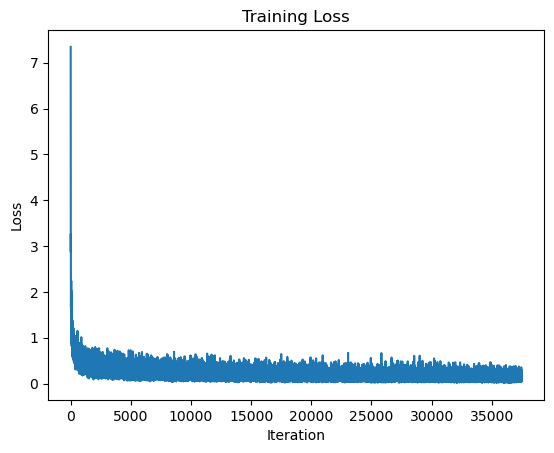

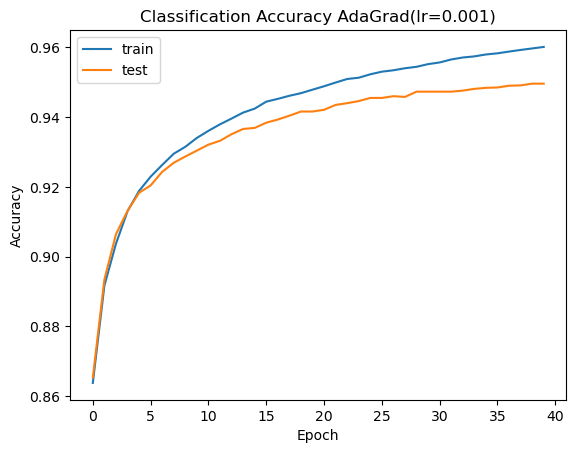

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 获取MNIST数据集
def load_mnist():
    with open("../data/" + "mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
X_train, y_train, X_test, y_test = load_mnist()

# 归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 标准化处理
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# 将标签转化为one-hot向量
n_classes = 10
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

# 定义网络结构
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = n_classes

# 初始化权重和偏置 采用随机初始化
W1 = np.random.randn(input_size, hidden_size_1) / np.sqrt(hidden_size_1)
b1 = np.zeros(hidden_size_1)
W2 = np.random.randn(hidden_size_1, hidden_size_2) / np.sqrt(hidden_size_2)
b2 = np.zeros(hidden_size_2)
W3 = np.random.randn(hidden_size_2, output_size) / np.sqrt(output_size)
b3 = np.zeros(output_size)

# 使用AdaGrad算法更新权重和偏置
sw1 = np.zeros_like(W1)
sb1 = np.zeros_like(b1)
sw2 = np.zeros_like(W2)
sb2 = np.zeros_like(b2)
sw3 = np.zeros_like(W3)
sb3 = np.zeros_like(b3)

# 定义激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_pred.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples
    return loss

# 定义训练函数
def train(X, y_true, learning_rate):
    global W1, W2, W3, b1, b2, b3
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    m = y_true.shape[0]
    # 计算损失函数值和梯度
    loss = cross_entropy_loss(y_pred, y_true)

    grad_y_pred = y_pred - y_true

    grad_W3 = 1./m*np.dot(a2.T, grad_y_pred)
    grad_b3 = 1./m*np.sum(grad_y_pred, axis=0)
    grad_a2 = np.dot(grad_y_pred, W3.T)

    grad_z2 = grad_a2.copy()
    grad_z2[z2 < 0] = 0
    grad_W2 = 1./m*np.dot(a1.T, grad_z2)
    grad_b2 = 1./m*np.sum(grad_z2, axis=0)
    grad_a1 = np.dot(grad_z2, W2.T)

    grad_z1 = grad_a1.copy()
    grad_z1[z1 < 0] = 0
    grad_W1 = 1./m*np.dot(X.T, grad_z1)
    grad_b1 = 1./m*np.sum(grad_z1, axis=0)

    # 使用AdaGrad算法更新权重和偏置
    global sw1, sb1, sw2, sb2, sw3, sb3
    sw3 = sw3 + grad_W3**2
    sb3 = sb3 + grad_b3**2
    W3 -= learning_rate * grad_W3 / (np.sqrt(sw3) + 1e-7)
    b3 -= learning_rate * grad_b3 / (np.sqrt(sb3) + 1e-7)

    sw2 = sw2 + grad_W2**2
    sb2 = sb2 + grad_b2**2
    W2 -= learning_rate * grad_W2 / (np.sqrt(sw2) + 1e-7)
    b2 -= learning_rate * grad_b2 / (np.sqrt(sb2) + 1e-7)

    sw1 = sw1 + grad_W1**2
    sb1 = sb1 + grad_b1**2
    W1 -= learning_rate * grad_W1 / (np.sqrt(sw1) + 1e-7)
    b1 -= learning_rate * grad_b1 / (np.sqrt(sb1) + 1e-7)

    return loss

def predict(X):
    global W1, W2, W3, b1, b2, b3
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    return np.argmax(y_pred, axis=-1)

learning_rate = 0.001
num_epochs = 40
batch_size = 64
num_batches = X_train.shape[0] // batch_size

train_loss_history = []
train_acc_history2 = []
test_acc_history2 = []
for epoch in range(num_epochs):
    # 在每个epoch前随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    for i in range(num_batches):
        # 从训练数据中随机抽取一个batch
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]

        # 训练一个batch，并记录损失函数值
        loss = train(X_batch, y_batch, learning_rate)
        train_loss_history.append(loss)

    # 计算训练集和测试集上的精度
    train_acc = np.mean(predict(X_train) == np.argmax(y_train, axis=-1))
    test_acc = np.mean(predict(X_test) == np.argmax(y_test, axis=-1))
    train_acc_history2.append(train_acc)
    test_acc_history2.append(test_acc)

    # 输出训练进度
    print('Epoch %d/%d, train loss: %f, train acc: %f, test acc: %f' % (epoch+1, num_epochs, loss, train_acc, test_acc))

plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc_history2, label='train')
plt.plot(test_acc_history2, label='test')
plt.title('Classification Accuracy AdaGrad(lr=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 5.4 使用RMSprop

Epoch 1/40, train loss: 0.092940, train acc: 0.956183, test acc: 0.949300
Epoch 2/40, train loss: 0.013099, train acc: 0.976117, test acc: 0.962800
Epoch 3/40, train loss: 0.054329, train acc: 0.981300, test acc: 0.970400
Epoch 4/40, train loss: 0.033963, train acc: 0.985483, test acc: 0.971500
Epoch 5/40, train loss: 0.033319, train acc: 0.988300, test acc: 0.972900
Epoch 6/40, train loss: 0.376566, train acc: 0.990550, test acc: 0.973300
Epoch 7/40, train loss: 0.078189, train acc: 0.989417, test acc: 0.971500
Epoch 8/40, train loss: 0.028108, train acc: 0.992533, test acc: 0.975400
Epoch 9/40, train loss: 0.000222, train acc: 0.994817, test acc: 0.976100
Epoch 10/40, train loss: 0.074961, train acc: 0.994417, test acc: 0.973500
Epoch 11/40, train loss: 0.005978, train acc: 0.994733, test acc: 0.975000
Epoch 12/40, train loss: 0.001286, train acc: 0.994067, test acc: 0.972100
Epoch 13/40, train loss: 0.000687, train acc: 0.995767, test acc: 0.974200
Epoch 14/40, train loss: 0.021357,

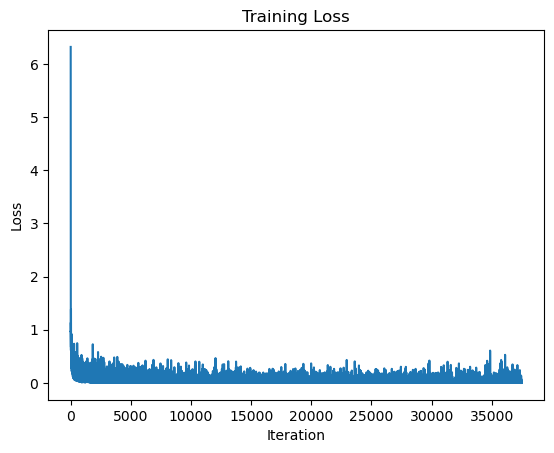

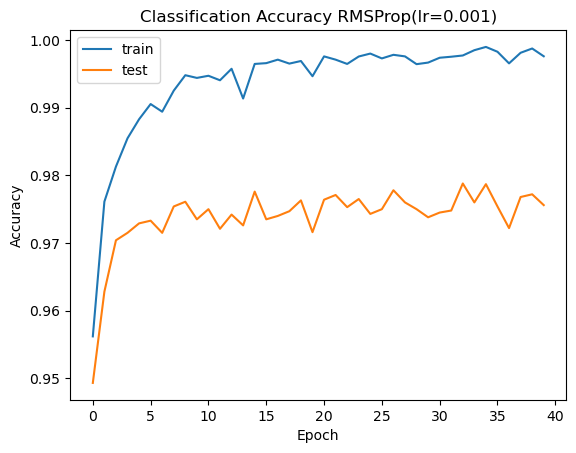

In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 获取MNIST数据集
def load_mnist():
    with open("../data/" + "mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
X_train, y_train, X_test, y_test = load_mnist()

# 归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 标准化处理
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# 将标签转化为one-hot向量
n_classes = 10
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

# 定义网络结构
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = n_classes

# 初始化权重和偏置 采用随机初始化
W1 = np.random.randn(input_size, hidden_size_1) / np.sqrt(hidden_size_1)
b1 = np.zeros(hidden_size_1)
W2 = np.random.randn(hidden_size_1, hidden_size_2) / np.sqrt(hidden_size_2)
b2 = np.zeros(hidden_size_2)
W3 = np.random.randn(hidden_size_2, output_size) / np.sqrt(output_size)
b3 = np.zeros(output_size)

# 使用AdaGrad算法更新权重和偏置
sw1 = np.zeros_like(W1)
sb1 = np.zeros_like(b1)
sw2 = np.zeros_like(W2)
sb2 = np.zeros_like(b2)
sw3 = np.zeros_like(W3)
sb3 = np.zeros_like(b3)

# 定义激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_pred.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples
    return loss

# 定义训练函数
def train(X, y_true, learning_rate):
    global W1, W2, W3, b1, b2, b3
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    m = y_true.shape[0]
    # 计算损失函数值和梯度
    loss = cross_entropy_loss(y_pred, y_true)

    grad_y_pred = y_pred - y_true

    grad_W3 = 1./m*np.dot(a2.T, grad_y_pred)
    grad_b3 = 1./m*np.sum(grad_y_pred, axis=0)
    grad_a2 = np.dot(grad_y_pred, W3.T)

    grad_z2 = grad_a2.copy()
    grad_z2[z2 < 0] = 0
    grad_W2 = 1./m*np.dot(a1.T, grad_z2)
    grad_b2 = 1./m*np.sum(grad_z2, axis=0)
    grad_a1 = np.dot(grad_z2, W2.T)

    grad_z1 = grad_a1.copy()
    grad_z1[z1 < 0] = 0
    grad_W1 = 1./m*np.dot(X.T, grad_z1)
    grad_b1 = 1./m*np.sum(grad_z1, axis=0)

    # 使用RMSProp算法更新权重和偏置
    global sw1, sb1, sw2, sb2, sw3, sb3
    sw1 = 0.9*sw1 + 0.1*grad_W1**2
    sb1 = 0.9*sb1 + 0.1*grad_b1**2
    sw2 = 0.9*sw2 + 0.1*grad_W2**2
    sb2 = 0.9*sb2 + 0.1*grad_b2**2
    sw3 = 0.9*sw3 + 0.1*grad_W3**2
    sb3 = 0.9*sb3 + 0.1*grad_b3**2

    W1 -= learning_rate * grad_W1 / (np.sqrt(sw1) + 1e-8)
    b1 -= learning_rate * grad_b1 / (np.sqrt(sb1) + 1e-8)
    W2 -= learning_rate * grad_W2 / (np.sqrt(sw2) + 1e-8)
    b2 -= learning_rate * grad_b2 / (np.sqrt(sb2) + 1e-8)
    W3 -= learning_rate * grad_W3 / (np.sqrt(sw3) + 1e-8)
    b3 -= learning_rate * grad_b3 / (np.sqrt(sb3) + 1e-8)

    return loss

def predict(X):
    global W1, W2, W3, b1, b2, b3
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    return np.argmax(y_pred, axis=-1)

learning_rate = 0.001
num_epochs = 40
batch_size = 64
num_batches = X_train.shape[0] // batch_size

train_loss_history = []
train_acc_history3 = []
test_acc_history3 = []
for epoch in range(num_epochs):
    # 在每个epoch前随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    for i in range(num_batches):
        # 从训练数据中随机抽取一个batch
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]

        # 训练一个batch，并记录损失函数值
        loss = train(X_batch, y_batch, learning_rate)
        train_loss_history.append(loss)

    # 计算训练集和测试集上的精度
    train_acc = np.mean(predict(X_train) == np.argmax(y_train, axis=-1))
    test_acc = np.mean(predict(X_test) == np.argmax(y_test, axis=-1))
    train_acc_history3.append(train_acc)
    test_acc_history3.append(test_acc)

    # 输出训练进度
    print('Epoch %d/%d, train loss: %f, train acc: %f, test acc: %f' % (epoch+1, num_epochs, loss, train_acc, test_acc))

plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc_history3, label='train')
plt.plot(test_acc_history3, label='test')
plt.title('Classification Accuracy RMSProp(lr=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 5.5 使用Adam

Epoch 1/40, train loss: 0.086668, train acc: 0.963983, test acc: 0.957600
Epoch 2/40, train loss: 0.129484, train acc: 0.970917, test acc: 0.964400
Epoch 3/40, train loss: 0.216562, train acc: 0.979883, test acc: 0.967400
Epoch 4/40, train loss: 0.010983, train acc: 0.982867, test acc: 0.969200
Epoch 5/40, train loss: 0.011833, train acc: 0.986783, test acc: 0.972100
Epoch 6/40, train loss: 0.014275, train acc: 0.989800, test acc: 0.975500
Epoch 7/40, train loss: 0.090691, train acc: 0.990233, test acc: 0.973900
Epoch 8/40, train loss: 0.091628, train acc: 0.988933, test acc: 0.973200
Epoch 9/40, train loss: 0.002679, train acc: 0.991750, test acc: 0.974500
Epoch 10/40, train loss: 0.022767, train acc: 0.994483, test acc: 0.975100
Epoch 11/40, train loss: 0.054630, train acc: 0.994433, test acc: 0.978500
Epoch 12/40, train loss: 0.060080, train acc: 0.994083, test acc: 0.975000
Epoch 13/40, train loss: 0.008519, train acc: 0.993950, test acc: 0.974300
Epoch 14/40, train loss: 0.019076,

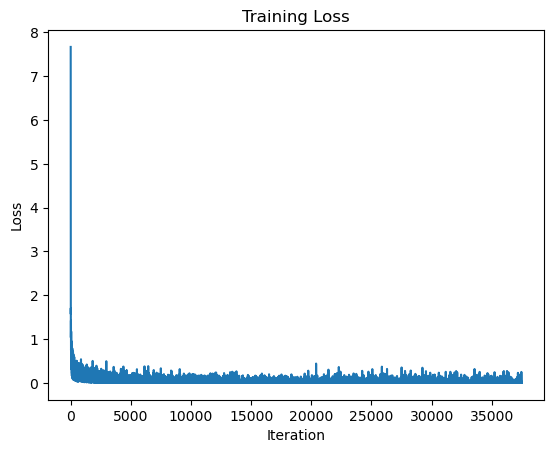

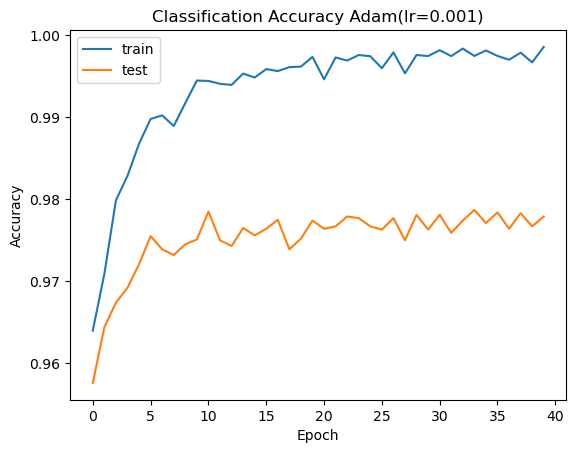

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 获取MNIST数据集
def load_mnist():
    with open("../data/" + "mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
X_train, y_train, X_test, y_test = load_mnist()

# 归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 标准化处理
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# 将标签转化为one-hot向量
n_classes = 10
y_train = np.eye(n_classes)[y_train]
y_test = np.eye(n_classes)[y_test]

# 定义网络结构
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 64
output_size = n_classes

# 初始化权重和偏置 采用随机初始化
W1 = np.random.randn(input_size, hidden_size_1) / np.sqrt(hidden_size_1)
b1 = np.zeros(hidden_size_1)
W2 = np.random.randn(hidden_size_1, hidden_size_2) / np.sqrt(hidden_size_2)
b2 = np.zeros(hidden_size_2)
W3 = np.random.randn(hidden_size_2, output_size) / np.sqrt(output_size)
b3 = np.zeros(output_size)

# 使用Adam优化器
# 定义Adam优化器的参数
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m1 = np.zeros_like(W1)
m2 = np.zeros_like(b1)
m3 = np.zeros_like(W2)
m4 = np.zeros_like(b2)
m5 = np.zeros_like(W3)
m6 = np.zeros_like(b3)
v1 = np.zeros_like(W1)
v2 = np.zeros_like(b1)
v3 = np.zeros_like(W2)
v4 = np.zeros_like(b2)
v5 = np.zeros_like(W3)
v6 = np.zeros_like(b3)
t = 0

# 定义激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_pred.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples
    return loss

# 定义训练函数
def train(X, y_true, learning_rate):
    global W1, W2, W3, b1, b2, b3
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    m = y_true.shape[0]
    # 计算损失函数值和梯度
    loss = cross_entropy_loss(y_pred, y_true)

    grad_y_pred = y_pred - y_true

    grad_W3 = 1./m*np.dot(a2.T, grad_y_pred)
    grad_b3 = 1./m*np.sum(grad_y_pred, axis=0)
    grad_a2 = np.dot(grad_y_pred, W3.T)

    grad_z2 = grad_a2.copy()
    grad_z2[z2 < 0] = 0
    grad_W2 = 1./m*np.dot(a1.T, grad_z2)
    grad_b2 = 1./m*np.sum(grad_z2, axis=0)
    grad_a1 = np.dot(grad_z2, W2.T)

    grad_z1 = grad_a1.copy()
    grad_z1[z1 < 0] = 0
    grad_W1 = 1./m*np.dot(X.T, grad_z1)
    grad_b1 = 1./m*np.sum(grad_z1, axis=0)

    # 使用Adam优化器更新参数
    global t, m1, m2, m3, m4, m5, m6, v1, v2, v3, v4, v5, v6, beta1, beta2, epsilon
    t += 1
    m1 = beta1 * m1 + (1 - beta1) * grad_W1
    m2 = beta1 * m2 + (1 - beta1) * grad_b1
    m3 = beta1 * m3 + (1 - beta1) * grad_W2
    m4 = beta1 * m4 + (1 - beta1) * grad_b2
    m5 = beta1 * m5 + (1 - beta1) * grad_W3
    m6 = beta1 * m6 + (1 - beta1) * grad_b3
    v1 = beta2 * v1 + (1 - beta2) * grad_W1**2
    v2 = beta2 * v2 + (1 - beta2) * grad_b1**2
    v3 = beta2 * v3 + (1 - beta2) * grad_W2**2
    v4 = beta2 * v4 + (1 - beta2) * grad_b2**2
    v5 = beta2 * v5 + (1 - beta2) * grad_W3**2
    v6 = beta2 * v6 + (1 - beta2) * grad_b3**2
    m1_hat = m1 / (1 - beta1**t)
    m2_hat = m2 / (1 - beta1**t)
    m3_hat = m3 / (1 - beta1**t)
    m4_hat = m4 / (1 - beta1**t)
    m5_hat = m5 / (1 - beta1**t)
    m6_hat = m6 / (1 - beta1**t)
    v1_hat = v1 / (1 - beta2**t)
    v2_hat = v2 / (1 - beta2**t)
    v3_hat = v3 / (1 - beta2**t)
    v4_hat = v4 / (1 - beta2**t)
    v5_hat = v5 / (1 - beta2**t)
    v6_hat = v6 / (1 - beta2**t)
    W1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
    b1 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
    W2 -= learning_rate * m3_hat / (np.sqrt(v3_hat) + epsilon)
    b2 -= learning_rate * m4_hat / (np.sqrt(v4_hat) + epsilon)
    W3 -= learning_rate * m5_hat / (np.sqrt(v5_hat) + epsilon)
    b3 -= learning_rate * m6_hat / (np.sqrt(v6_hat) + epsilon)

    return loss

def predict(X):
    global W1, W2, W3, b1, b2, b3
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = softmax(z3)
    return np.argmax(y_pred, axis=-1)

learning_rate = 0.001
num_epochs = 40
batch_size = 64
num_batches = X_train.shape[0] // batch_size

train_loss_history = []
train_acc_history4 = []
test_acc_history4 = []
for epoch in range(num_epochs):
    # 在每个epoch前随机打乱训练数据
    permutation = np.random.permutation(X_train.shape[0])
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    for i in range(num_batches):
        # 从训练数据中随机抽取一个batch
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]

        # 训练一个batch，并记录损失函数值
        loss = train(X_batch, y_batch, learning_rate)
        train_loss_history.append(loss)

    # 计算训练集和测试集上的精度
    train_acc = np.mean(predict(X_train) == np.argmax(y_train, axis=-1))
    test_acc = np.mean(predict(X_test) == np.argmax(y_test, axis=-1))
    train_acc_history4.append(train_acc)
    test_acc_history4.append(test_acc)

    # 输出训练进度
    print('Epoch %d/%d, train loss: %f, train acc: %f, test acc: %f' % (epoch+1, num_epochs, loss, train_acc, test_acc))

plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(train_acc_history4, label='train')
plt.plot(test_acc_history4, label='test')
plt.title('Classification Accuracy Adam(lr=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 学习曲线对比

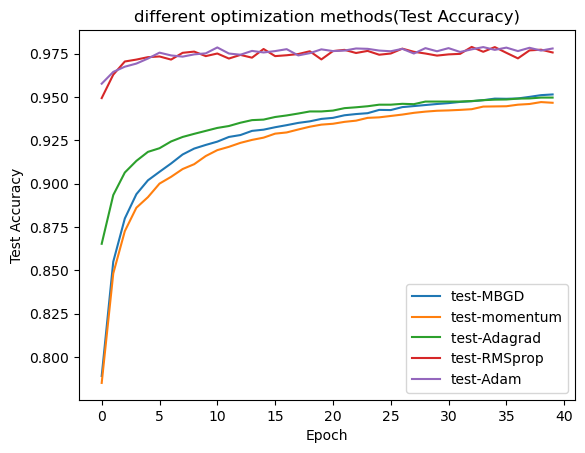

In [6]:
# plt.plot(train_acc_history0, label='train-MBGD')
plt.plot(test_acc_history0, label='test-MBGD')
# plt.plot(train_acc_history1, label='train-momentum')
plt.plot(test_acc_history1, label='test-momentum')
# plt.plot(train_acc_history2, label='train-Adagrad ')
plt.plot(test_acc_history2, label='test-Adagrad ')
# plt.plot(train_acc_history3, label='train-RMSprop')
plt.plot(test_acc_history3, label='test-RMSprop')
# plt.plot(train_acc_history4, label='train-Adam')
plt.plot(test_acc_history4, label='test-Adam')
plt.title('different optimization methods(Test Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.savefig('different optimization methods(Test Accuracy).png')
plt.show()

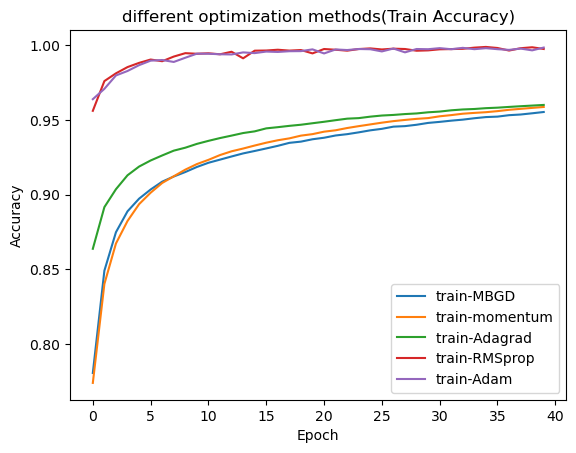

In [7]:
plt.plot(train_acc_history0, label='train-MBGD')
# plt.plot(test_acc_history0, label='test-MBGD')
plt.plot(train_acc_history1, label='train-momentum')
# plt.plot(test_acc_history1, label='test-momentum')
plt.plot(train_acc_history2, label='train-Adagrad ')
# plt.plot(test_acc_history2, label='test-Adagrad ')
plt.plot(train_acc_history3, label='train-RMSprop')
# plt.plot(test_acc_history3, label='test-RMSprop')
plt.plot(train_acc_history4, label='train-Adam')
# plt.plot(test_acc_history4, label='test-Adam')
plt.title('different optimization methods(Train Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('different optimization methods(Train Accuracy).png')
plt.show()